# Exploratory Data analysis - by Chirag Lodaya 
### Data Description: The data at hand contains medical costs of people characterized by certain attributes.

### Domain: Healthcare

### Context: Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. 

### Attribute Information:
#### age: age of primary beneficiary
#### sex: insurance contractor gender, female, male
#### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
#### children: Number of children covered by health insurance / Number of dependents
#### smoker: Smoking
#### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
#### charges: Individual medical costs billed by health insurance.

### Objective: Exploratory Data analysis to explore and generate value out of this data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
sns.set(color_codes=True)
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,f_oneway
from statsmodels.stats.power import ttest_power
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats


/Users/clodaya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### In the above block of code
- ### The necessary libraries are imported to perform EDA and other statistical analysis on the data

In [2]:
data=pd.read_csv("insurance.csv")
print(data.head())



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### In the above block of code, 
- ### The insurance data has been read from a csv file into a data frame called as data and a basic view 5 rows of data is viewed

In [43]:

data.shape



(1338, 7)

### In the above block of code, the shape of data is viewed. 
- ### The shape is 1338 cross 7
- ### which means for our seven attributes, we have 1338 rows/tuples or different values

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### In the above block of code, we see data types of each attribute.
- ### There are 4 numerical attributes out of which age, children are integers, bmi,charges are floating type  numbers. 
- ### There are 3 string/object type attributes, they are sex, smoker and region

In [45]:
#1.Checking for missing values in Object data types other than NaN(This needs to be done since any other string will still be counted as object)

print('Differenty values of categorical data types:')
print('Sex:', data['sex'].unique())
print('Smoker:',data['smoker'].unique())
print('region:',data['region'].unique())

#2. Checking for missing values in Numerical data types (The above step can be skipped for numerical values since the type is int, float and not object for numerical attributes)


pd.DataFrame(data.isnull().sum(), columns= ['Number of missing values'])

Differenty values of categorical data types:
Sex: ['female' 'male']
Smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


,Number of missing values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### In the above block of code, we are checking for missing values. 
- ### The first steap is done to check non common missing values like ? etc. As we see there are not any. Since all the object data types have theier expected unique categorical values
- ### In the second step we check proper missing values (NaN) and as seen from the table, there are not any

      age       bmi  children       charges
min  18.0  15.96000       0.0   1121.873900
25%  27.0  26.29625       0.0   4740.287150
50%  39.0  30.40000       1.0   9382.033000
75%  51.0  34.69375       2.0  16639.912515
max  64.0  53.13000       5.0  63770.428010


Box plot showing five point summary for age


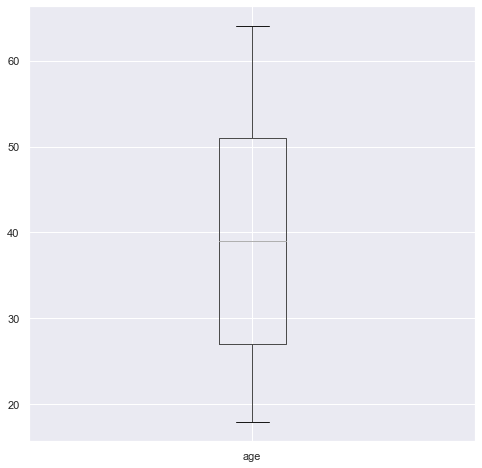

Box plot showing five point summary for bmi


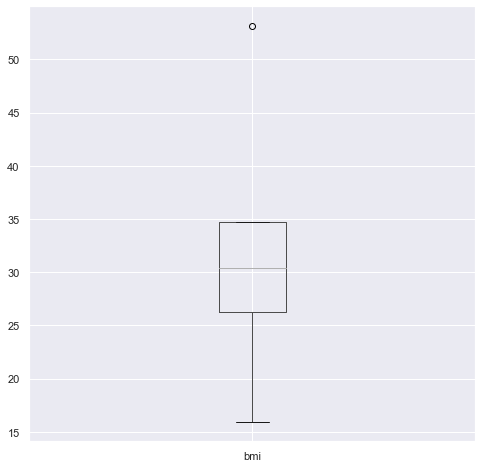

Box plot showing five point summary for children


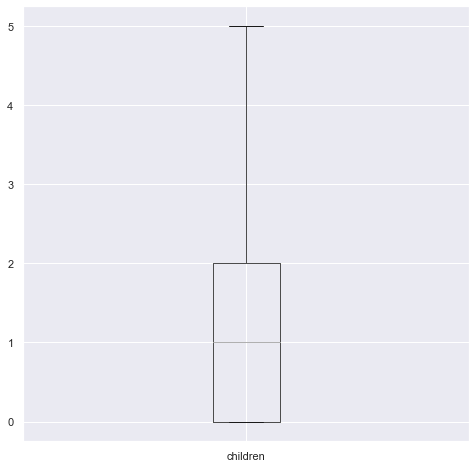

Box plot showing five point summary for charges


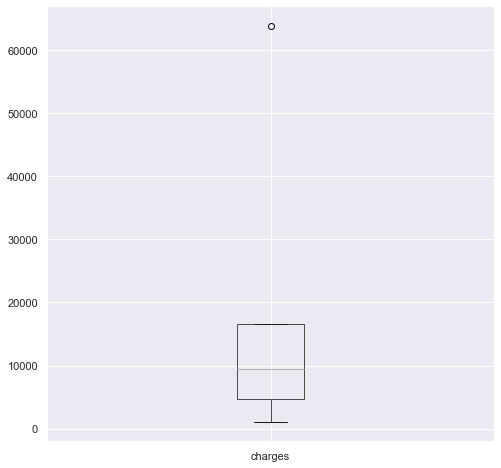

In [46]:
fivepoint=data.describe(exclude=object)  #exclusing categorical data
fivepoint=fivepoint.drop(['count','mean','std'], axis=0)
print(fivepoint)
print('\n\nBox plot showing five point summary for age')
fivepoint.boxplot(column="age",return_type='axes',figsize=(8,8))
plt.show()
print('Box plot showing five point summary for bmi')
fivepoint.boxplot(column="bmi",return_type='axes',figsize=(8,8))
plt.show()
print('Box plot showing five point summary for children')
fivepoint.boxplot(column="children",return_type='axes',figsize=(8,8))
plt.show()
print('Box plot showing five point summary for charges')
fivepoint.boxplot(column="charges",return_type='axes',figsize=(8,8))
plt.show()

### In the above block of code, we see the 5 point summary of all the numerical attributes.
- ### The data looks like a good distribution
- ### We can see the age distribution of insurance is evenly distributed and lies from people of 18 years to people as old as 64 years
- ### The bmi attribute is also evenly distributed ranging from 15.9 to 53.13
- ### The children attribute is not that evenly distributed, we can see almost 75% people have 2 or less children
- ### The charges attribute is extremely skewed and variable. Since not all people require the same insurance money, some require very less or some require a lot depending on the severity of the disease. So we see a very variable and skewed numbers for charges


Mean of bmi:  30.663396860986538 
25% value of bmi:  26.29625 
Median of bmi:  30.4 
75% value of bmi:  34.69375 
Mode of bmi:  32.3 
Max of bmi:  53.13 
Min of bmi:  15.96


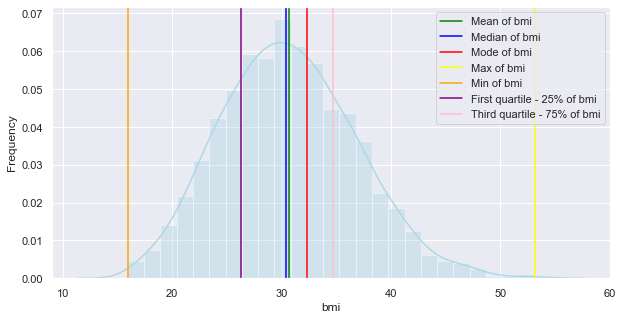

Mean of age:  39.20702541106129 
25% value of age:  27.0 
Median of age:  39.0 
75% value of age:  51.0 
Mode of age:  18 
Max of age:  64 
Min of age:  18


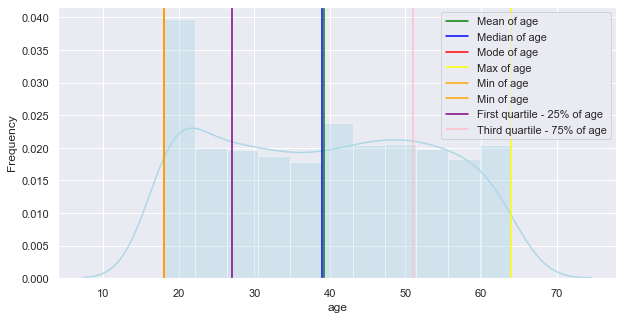

Mean of charges:  13270.422265141257 
25% value of charges:  4740.28715 
Median of charges:  9382.033 
75% value of charges:  16639.912515 
Mode of charges:  1639.5631 
Max of charges:  63770.42801 
Min of charges:  1121.8739


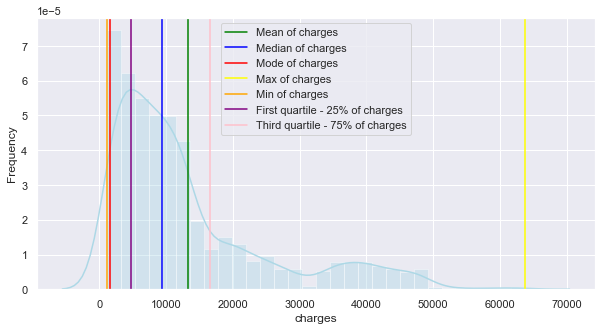

In [47]:
dist = data.drop(['sex', 'children', 'smoker', 'region'],axis=1)
mean_bmi=dist['bmi'].mean()
median_bmi=dist['bmi'].median()
mode_bmi=dist['bmi'].mode()
bmi25=dist['bmi'].quantile(q=0.25)
bmi75=dist['bmi'].quantile(q=0.75)
max_bmi=dist['bmi'].max()
min_bmi=dist['bmi'].min()

print('Mean of bmi: ',mean_bmi, '\n25% value of bmi: ',bmi25,'\nMedian of bmi: ',median_bmi, '\n75% value of bmi: ',bmi75, '\nMode of bmi: ',mode_bmi[0], '\nMax of bmi: ',max_bmi, '\nMin of bmi: ',min_bmi)

plt.figure(figsize=(10,5)) 
sns.distplot(dist['bmi'],color='lightblue')

plt.axvline(mean_bmi,color='green',label='Mean of bmi')    
plt.axvline(median_bmi,color='blue',label='Median of bmi')
plt.axvline(mode_bmi[0],color='red',label='Mode of bmi')
plt.axvline(max_bmi,color='yellow',label='Max of bmi')
plt.axvline(min_bmi,color='orange',label='Min of bmi')
plt.axvline(bmi25,color='purple',label='First quartile - 25% of bmi')
plt.axvline(bmi75,color='pink',label='Third quartile - 75% of bmi')

plt.xlabel('bmi')  
plt.ylabel('Frequency')   
plt.legend()             
plt.show()

mean_age=dist['age'].mean()
median_age=dist['age'].median()
mode_age=dist['age'].mode()
max_age=dist['age'].max()
min_age=dist['age'].min()
age25=dist['age'].quantile(q=0.25)
age75=dist['age'].quantile(q=0.75)
print('Mean of age: ',mean_age,'\n25% value of age: ',age25,'\nMedian of age: ',median_age, '\n75% value of age: ',age75,'\nMode of age: ',mode_age[0], '\nMax of age: ',max_age, '\nMin of age: ',min_age)

plt.figure(figsize=(10,5)) 
sns.distplot(dist['age'],color='lightblue')

plt.axvline(mean_age,color='green',label='Mean of age')    
plt.axvline(median_age,color='blue',label='Median of age')
plt.axvline(mode_age[0],color='red',label='Mode of age')
plt.axvline(max_age,color='yellow',label='Max of age')
plt.axvline(min_age,color='orange',label='Min of age')
plt.axvline(min_age,color='orange',label='Min of age')
plt.axvline(age25,color='purple',label='First quartile - 25% of age')
plt.axvline(age75,color='pink',label='Third quartile - 75% of age')


plt.xlabel('age')  
plt.ylabel('Frequency')   
plt.legend()              
plt.show()


dist = data.drop(['sex', 'children', 'smoker', 'region'],axis=1)
mean_charges=dist['charges'].mean()
median_charges=dist['charges'].median()
mode_charges=dist['charges'].mode()
max_charges=dist['charges'].max()
min_charges=dist['charges'].min()
charges25=dist['charges'].quantile(q=0.25)
charges75=dist['charges'].quantile(q=0.75)
print('Mean of charges: ',mean_charges,'\n25% value of charges: ',charges25,'\nMedian of charges: ',median_charges, '\n75% value of charges: ',charges75,'\nMode of charges: ',mode_charges[0], '\nMax of charges: ',max_charges, '\nMin of charges: ',min_charges)
plt.figure(figsize=(10,5)) 
sns.distplot(dist['charges'],color='lightblue')

plt.axvline(mean_charges,color='green',label='Mean of charges')    
plt.axvline(median_charges,color='blue',label='Median of charges')
plt.axvline(mode_charges[0],color='red',label='Mode of charges')
plt.axvline(max_charges,color='yellow',label='Max of charges')
plt.axvline(min_charges,color='orange',label='Min of charges')
plt.axvline(charges25,color='purple',label='First quartile - 25% of charges')
plt.axvline(charges75,color='pink',label='Third quartile - 75% of charges')

plt.xlabel('charges')  
plt.ylabel('Frequency')   
plt.legend()             
plt.show()

### In the above block of code, we see the distribution of bmi, age and charges in the form of
- ### histogram, along with the probablity density curve as well as mean, mode and the five point summary plotted over it
- ### Bmi looks quite evenly and normally distributed. The mean, median and mode are almost similar giving us more reason to believe that the distribution is normal
- ### Age also looks quite uniform and upto some extent, normally distributed. mean and median are same, but mode is likely very small and to the left
- ### The charges attributes looks highly skewed and not normally distributed. The mean, median, mode are far apart and the data is highly skewed, since insurance charges vary a lot amongst people of different category and needs

         Skewness
age      0.055673
bmi      0.284047
charges  1.515880


Skewness of bmi is:  0.2840471105987493


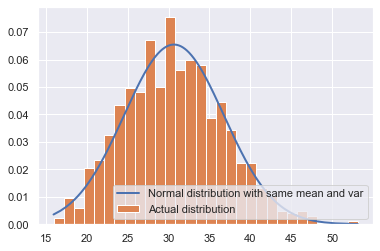

Skewness of age is:  0.055672515652991104


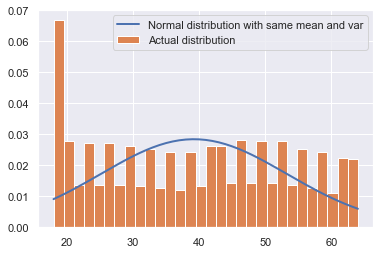

Skewness of charges is:  1.5158796580240428


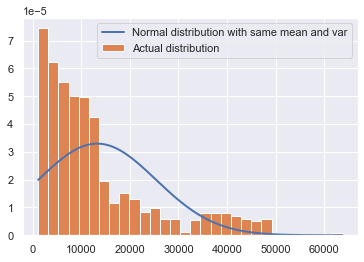

In [48]:
# f Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
#Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. 
#If the curve is shifted to the left or to the right, it is said to be skewed. 
#Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. 
#A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

skew=dist.skew()
skewtab= pd.DataFrame({'Skewness': skew})
print(skewtab)
print('\n\nSkewness of bmi is: ',skew['bmi'])
skew_bmi = np.asarray(dist['bmi'])
skew_bmi = sorted(skew_bmi)
fit = stats.norm.pdf(skew_bmi, np.mean(skew_bmi), np.std(skew_bmi)) 
plt.plot(skew_bmi,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(skew_bmi, density=True, bins = 30,label="Actual distribution")     
plt.legend()
plt.show()

print('Skewness of age is: ',skew['age'])
skew_age = np.asarray(dist['age'])
skew_age = sorted(skew_age)
fit = stats.norm.pdf(skew_age, np.mean(skew_age), np.std(skew_age)) 
plt.plot(skew_age,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(skew_age, density=True, bins = 30,label="Actual distribution")     
plt.legend()
plt.show()

print('Skewness of charges is: ',skew['charges'])
skew_charges = np.asarray(dist['charges'])
skew_charges = sorted(skew_charges)
fit = stats.norm.pdf(skew_charges, np.mean(skew_charges), np.std(skew_charges)) 
plt.plot(skew_charges,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(skew_charges, density=True, bins = 30,label="Actual distribution")     
plt.legend()
plt.show()

### In the above block of code, we the skewness of bmi, age and charges, the orange histogram is the actual distribution of data, the blue curve is what the normal data would look like with the same mean and variance (As skewness gets close to zero, the distribution is considered normal)
- ### Bmi looks very evenly and normally distributed and from the skewness values 0.28 which is very close to 0 it is evidence that the data is normally distributed
- ### Age looks very evenly and normally distributed as well and from the skewness values 0.05 which is very close to 0 it is again evidence that the age data is normally distributed as well
- ### The skew value of charges is 1.51 which is very far off from 1 and as it can be seen the charges data is highly skewed and far away from 0, and not a normal distribution



                  IQR
age         24.000000
bmi          8.397500
charges  11899.625365


 Box plot of attribute bmi


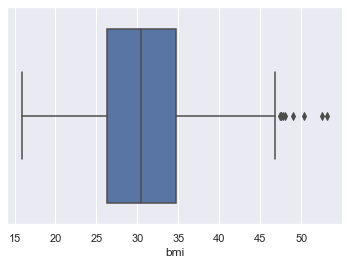

The outlier bmi values are:
Indices   bmi
 116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


 Box plot of attribute age


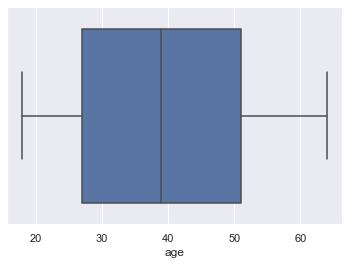

The outlier age values are:
Indices   Age
 Series([], Name: age, dtype: int64)


 Box plot of attribute charges


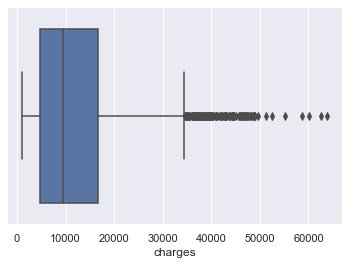

The outlier charges values are:
Indices   Charges
 14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


In [49]:

Q1 = dist.quantile(0.25)
Q3 = dist.quantile(0.75)
IQR = Q3 - Q1
iqrtab= pd.DataFrame({'IQR': IQR})
print(iqrtab)
print('\n\n Box plot of attribute bmi')
sns.boxplot(dist['bmi'])
plt.show()
temp1=dist['bmi']
print('The outlier bmi values are:\nIndices   bmi\n',temp1[((temp1 < (Q1['bmi'] - 1.5 * IQR['bmi'])) | (temp1> (Q3['bmi'] + 1.5 * IQR['bmi'])))])


print('\n\n Box plot of attribute age')
sns.boxplot(dist['age'])
plt.show()
temp2=dist['age']
print('The outlier age values are:\nIndices   Age\n',temp2[((temp2 < (Q1['age'] - 1.5 * IQR['age'])) | (temp2> (Q3['age'] + 1.5 * IQR['age'])))])


print('\n\n Box plot of attribute charges')
sns.boxplot(dist['charges'])
plt.show()
temp3=dist['charges']
print('The outlier charges values are:\nIndices   Charges\n',temp3[((temp3 < (Q1['charges'] - 1.5 * IQR['charges'])) | (temp3> (Q3['charges'] + 1.5 * IQR['charges'])))])



### In the above block of code, we check for outliers in  bmi, age and charges, we use the IQR and box plot concept
- ### Although bmi is normally distributed, there are a few outliers on the max extreme.
- ### Age is normally distributed, there are no outliers
- ### As we have see from our above analysis, charges is extremely skewed and there are a lot of outliers on the max side.

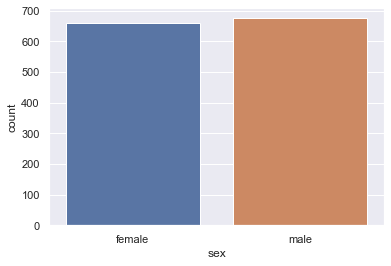

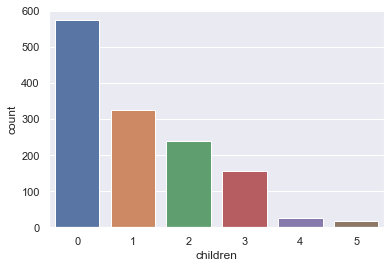

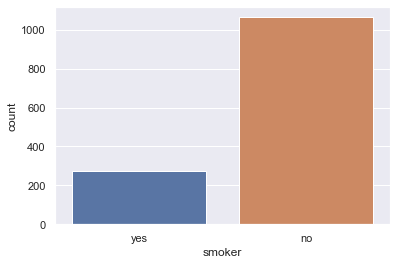

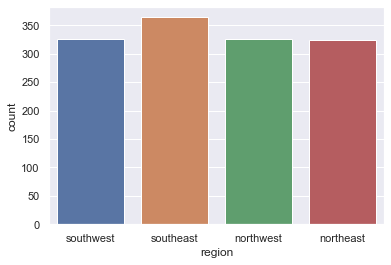

In [50]:
dist2 = data.drop(['bmi', 'age', 'charges'],axis=1)
sns.countplot(dist2['sex'])
plt.show()
sns.countplot(dist2['children'])
plt.show()
sns.countplot(dist2['smoker'])
plt.show()
sns.countplot(dist2['region'])
plt.show()

### In the above block of code, we see the distribution of sex, children, smoker and region
- ### In the sex attribute we see that males and females are quite equal and comparable
- ### In the children attribute we see that most of the people have 0,1,2 children and very less people have 3, 4, 5 children
- ### In the smoker attribute we see that majority of the people are non smokers and small amount of people are smokers
- ### In the regions attribute, we see there are people almost equally from all regions.

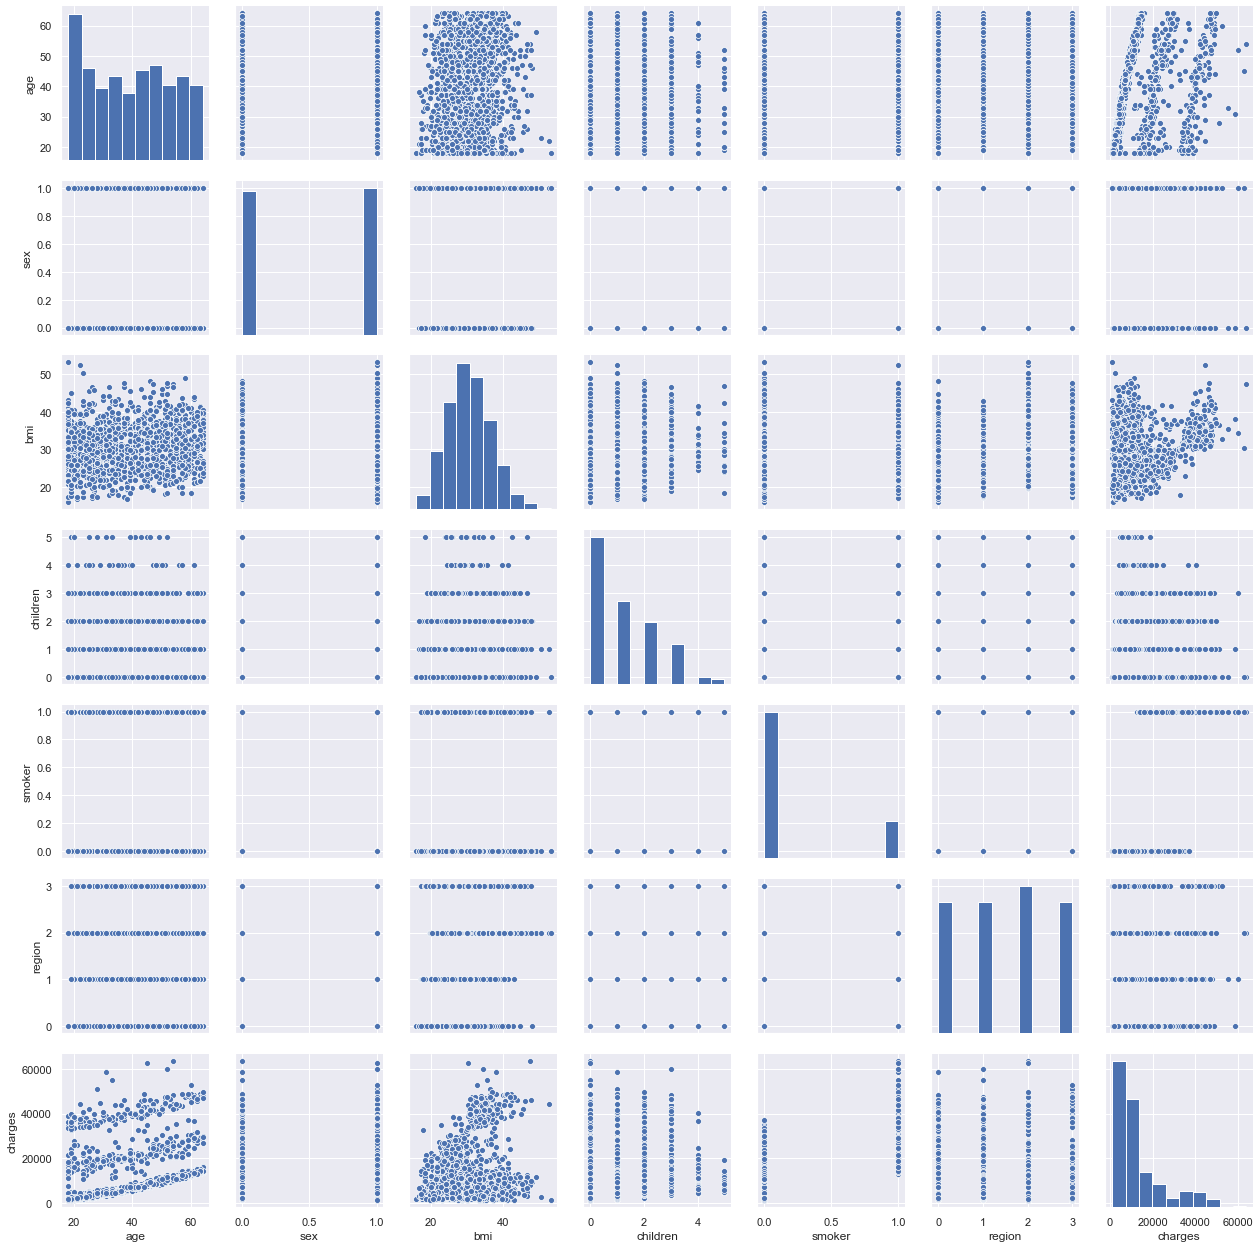

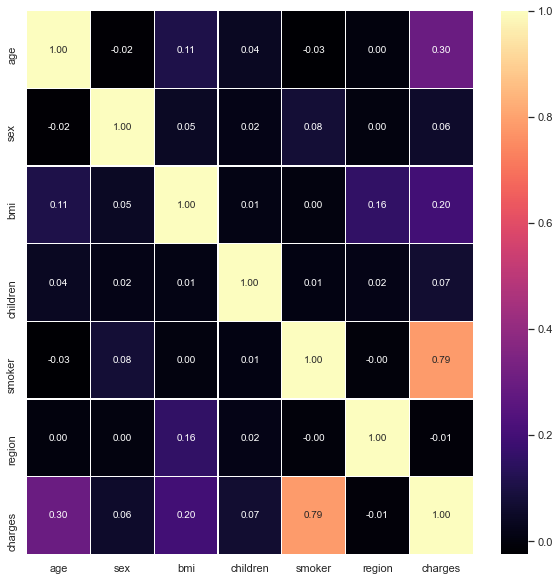

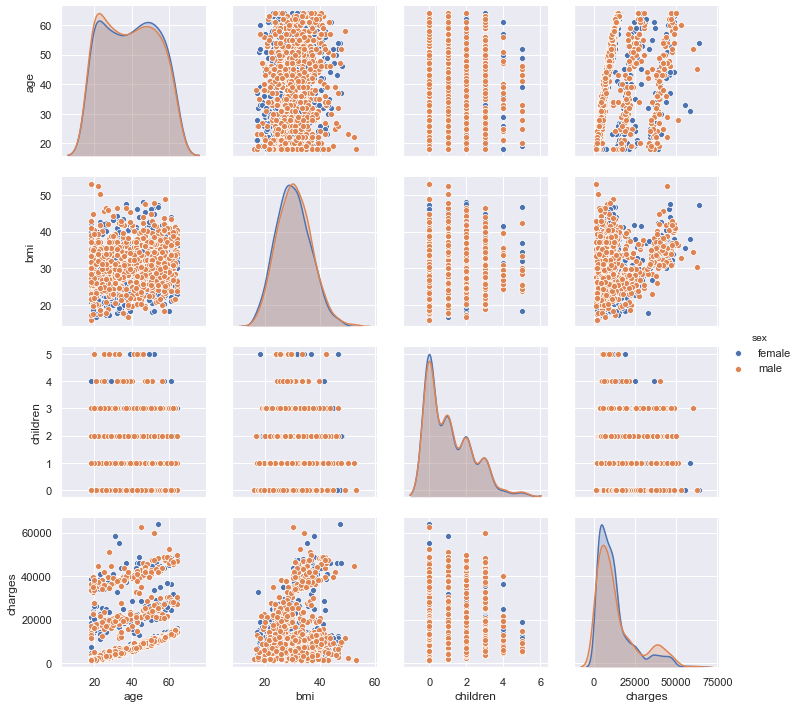

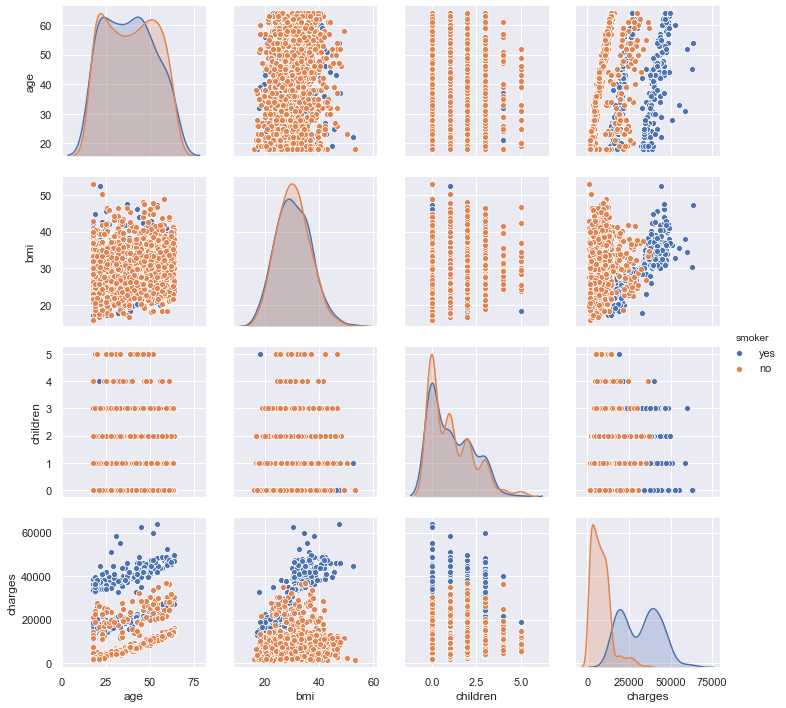

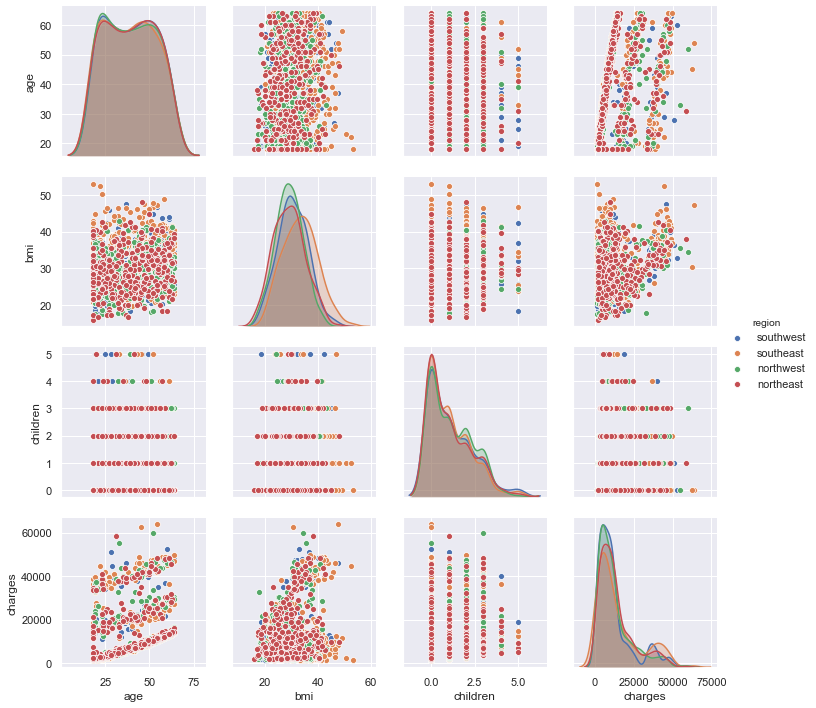

In [51]:
#i) Pair plot that includes all the columns of the data frame

#one is by encoding the categorical variables

data_encoded = copy.deepcopy(data)
data_encoded.loc[:,['sex', 'smoker', 'region']] = data_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(data_encoded)
plt.show()

fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(data_encoded.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

#another way is by using categorical varibales as hues
sns.pairplot(data, hue='sex')  
plt.show()
sns.pairplot(data, hue='smoker')  
plt.show()
sns.pairplot(data, hue='region')  
plt.show()


### In the above block of code, we see pair plot of every attribute.
- ### Since the pair plot since it does not consider object, we need to encode the ctegorical attributes.
- ### If these is not be done, we can check pairplots of numerical attribute with categorical attributes as hue.
- ### from the pairplot and heat map, we see that most of the data are not correlated.
- ### the weak correlations are:
- ### charges and age, as we know older people require more insurance money hence these are slightly positvely correlated
- ###  charges and bmi, as we know more bmi, bad health, which is the reason people with high bmi need more mnoney,hence these are slightly positvely correlated
- ### The highest and the stronegst correlation is among smokesr and charges. Obvious reason smokers have higher health issues and tend to require a lot of more insurance charges

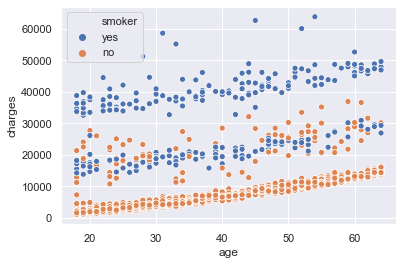

-46.664921172723716 8.271435842177219e-283


The charges for smokers and non smomker are not equal since 8.271435842177219e-283 is smaller than 0.5


In [52]:
#Graphical Analysis

sns.scatterplot(data['age'],data['charges'],hue=data['smoker'])
plt.show()

#statistical analysis

#Ho = The charges for smokesr and no smokers are equal
#Ha = The charges are not equal


 
nonsmoker = data[data['smoker'] == 'no']
smoker = data[data['smoker']=='yes']

nonsmoker_charges = nonsmoker['charges']
smoker_charges = smoker['charges']

t,p = ttest_ind(nonsmoker_charges, smoker_charges)
print(t,p)
# Setting our confidence level at 95% and significance level at 5%,

if p < 0.05:  
    print('\n\nThe charges for smokers and non smomker are not equal since', p, 'is smaller than 0.5')
else:
    print('The charges for smokers and non smomker are equal since', p, 'is greater than 0.5')


### In the above block of code we see graphical analysis and hypothesis analysis(t test)
- ### From graphical analysis we see that the charges for smoker are obviously higher than that of no smoker
- ### We confirm from hypothesis analysis that the charges for smokers and non smomker are not equal and significantly different

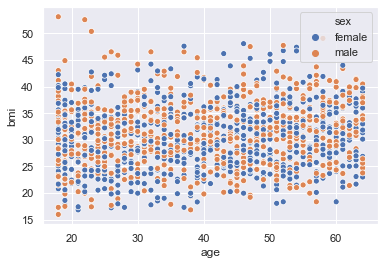

1.696752635752224 0.08997637178984932
The bmi for males and females are equal since 0.08997637178984932 is greater than 0.5


In [53]:
# b) Does bmi of males differ significantly from that of females?

#Graphical Analysis

sns.scatterplot(data['age'],data['bmi'],hue=data['sex'])
plt.show()




#Ho = The bmi for males and females are equal
#Ha = The bmi are not equal


males = data[data['sex'] == 'male']
females = data[data['sex']=='female']

male_bmi = males['bmi']
female_bmi = females['bmi']

t,p = ttest_ind(male_bmi, female_bmi)
print(t,p)
# Setting our significance level at 5%

if p < 0.05:  
    print('The bmi for males and females are not equal since', p, 'is less than 0.5')
else:
    print('The bmi for males and females are equal since', p, 'is greater than 0.5')

### In the above block of code we see graphical analysis and hypothesis analysis(t test)
- ### From graphical analysis we cannot infer or conclude anything.
- ### We confirm from hypothesis analysis that the the bmi for males and females are equal and does not differe significanlty

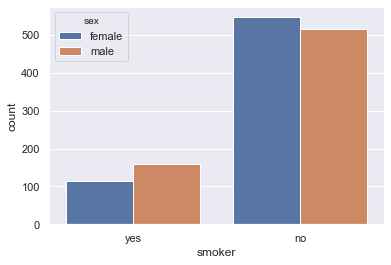

cross tab of sex and smoker

 smoker   no  yes
sex             
female  547  115
male    517  159
 

Proportion of smokers in females, males = 0.17%, 0.24% respectively
-2.7867402154855503 0.005324114164320532

The propotion of smokers in males and females are not equal since 0.005324114164320532 is less than 0.5


In [54]:
#c. Is the proportion of smokers significantly different in different genders?

sns.countplot(data['smoker'],hue=data['sex']);
plt.show()

## Ho = The proportions of smokeres in males and females are equal
## Ha =The proportions of smokeres in males and females are not equal

female_smokers = data[data['sex'] == 'female'].smoker.value_counts()[1]  
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()[1] 
n_females = data.sex.value_counts()[1] 
n_males = data.sex.value_counts()[0] 
crosstab = pd.crosstab(data['sex'],data['smoker']) 
print('cross tab of sex and smoker\n\n',crosstab)
print(f' \n\nProportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')
from statsmodels.stats.proportion import proportions_ztest
t, p = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
# Setting our significance level at 5%
print(t,p)
if p < 0.05:
    print('\nThe propotion of smokers in males and females are not equal since',p, 'is less than 0.5')
else:
    print('\nThe propotion of smokers in males and females are equal since',p, 'is greater than 0.5')

### In the above block of code we see graphical analysis and hypothesis analysis(propotion test)
- ### From graphical analysis we can say that there is difference in propotion of smokers in males and females.
- ### We confirm from hypothesis analysis the propotion of smokers in males and females are not equal and differ significantly

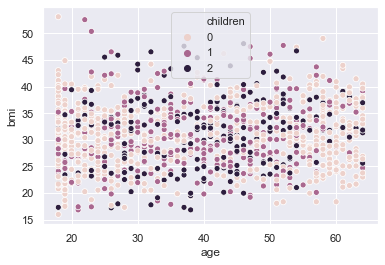

0.018302471038044173 0.9818642259087687
No. of children has no effect on bmi since 0.9818642259087687 is greater than 0.05


In [55]:


#graphical analysis

newdata=data[data['children']<3]
sns.scatterplot(newdata['age'],newdata['bmi'],hue=newdata['children'])
plt.show()

#Ho = "No. of children has no effect on bmi"  
#Ha = "No. of children has an effect on bmi" 

females=data[data['sex']=='female']
zerochild = data[data['children'] == 0]['bmi']
onechild = data[data['children'] == 1]['bmi']
twochild = data[data['children'] == 0]['bmi']

s, p = f_oneway(zerochild, onechild, twochild)
print(s,p)
# Setting our significance level at 5%

if p < 0.05:  
    print('No. of children has an effect on bmi since', p, 'is less than 0.05')
else:
    print('No. of children has no effect on bmi since', p, 'is greater than 0.05')

### In the above block of code we see graphical analysis and hypothesis analysis(One way Anova)
- ### From graphical analysis we cannot say much
- ### We confirm from hypothesis analysis that number of children has no effect on bmi 